# SQL Examples using SQLAlchemy in Python

Summary: Demonstrate the use of SQLAlchemy to make SQL queries.

SQLAlchemy features:
- Supported platforms: Python, Jython, Pypy
- Various SQL databases are supported including dialects for SQLite, Postgresql, MySQL, Oracle, MS-SQL, Firebird, Sybase and others, most of which support multiple DBAPIs.
- Reference: https://www.sqlalchemy.org/features.html

# 1. Import packages

In [120]:
from sqlalchemy import (create_engine, MetaData, Table, select, and_,
or_, not_, between, func, case, cast, Float)
import pandas as pd
import matplotlib.pyplot as plt

# 2. Explore database before querying using SQLite

In [43]:
# check table names
engine = create_engine('sqlite:///chinook.db')
connection = engine.connect()
print('Table names: ', engine.table_names())

Table names:  ['albums', 'artists', 'customers', 'employees', 'genres', 'invoice_items', 'invoices', 'media_types', 'playlist_track', 'playlists', 'sqlite_sequence', 'sqlite_stat1', 'tracks']


In [35]:
# view column names and data types
metadata = MetaData()
employees = Table('employees', metadata, autoload=True, 
               autoload_with=engine)
print(repr(employees))

Table('employees', MetaData(bind=None), Column('EmployeeId', INTEGER(), table=<employees>, primary_key=True, nullable=False), Column('LastName', NVARCHAR(length=20), table=<employees>, nullable=False), Column('FirstName', NVARCHAR(length=20), table=<employees>, nullable=False), Column('Title', NVARCHAR(length=30), table=<employees>), Column('ReportsTo', INTEGER(), ForeignKey('employees.EmployeeId'), table=<employees>), Column('BirthDate', DATETIME(), table=<employees>), Column('HireDate', DATETIME(), table=<employees>), Column('Address', NVARCHAR(length=70), table=<employees>), Column('City', NVARCHAR(length=40), table=<employees>), Column('State', NVARCHAR(length=40), table=<employees>), Column('Country', NVARCHAR(length=40), table=<employees>), Column('PostalCode', NVARCHAR(length=10), table=<employees>), Column('Phone', NVARCHAR(length=24), table=<employees>), Column('Fax', NVARCHAR(length=24), table=<employees>), Column('Email', NVARCHAR(length=60), table=<employees>), schema=None)

# 3. Basic workflow

In [77]:
# Create the database engine
engine = create_engine('sqlite:///chinook.db')

# Use context manager to connect to the engine and 
# skip manually closing the connection
with engine.connect() as con:
    # query the database by selecting columns
    rs = con.execute("SELECT * FROM Employees")
    # save as pandas dataframe and select 20 rows with size argument
    df = pd.DataFrame(rs.fetchmany(size=5))
    # set column names
    df.columns = rs.keys()
    
# EDA
print(len(df))
print(df.head())

5
   EmployeeId LastName FirstName                Title  ReportsTo  \
0           1    Adams    Andrew      General Manager        NaN   
1           2  Edwards     Nancy        Sales Manager        1.0   
2           3  Peacock      Jane  Sales Support Agent        2.0   
3           4     Park  Margaret  Sales Support Agent        2.0   
4           5  Johnson     Steve  Sales Support Agent        2.0   

             BirthDate             HireDate              Address      City  \
0  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW  Edmonton   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW   Calgary   
2  1973-08-29 00:00:00  2002-04-01 00:00:00        1111 6 Ave SW   Calgary   
3  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW   Calgary   
4  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave   Calgary   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T5K 2N1  +1 (780) 428-9482  +1 (7

# 4. Load directly into pandas dataframe

In [73]:
# Create engine: engine
engine = create_engine('sqlite:///chinook.db')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Employees", engine)

print('dataframe dimensions: ', df.shape)
print(df.head(5))

dataframe dimensions:  (8, 15)
   EmployeeId LastName FirstName                Title  ReportsTo  \
0           1    Adams    Andrew      General Manager        NaN   
1           2  Edwards     Nancy        Sales Manager        1.0   
2           3  Peacock      Jane  Sales Support Agent        2.0   
3           4     Park  Margaret  Sales Support Agent        2.0   
4           5  Johnson     Steve  Sales Support Agent        2.0   

             BirthDate             HireDate              Address      City  \
0  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW  Edmonton   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW   Calgary   
2  1973-08-29 00:00:00  2002-04-01 00:00:00        1111 6 Ave SW   Calgary   
3  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW   Calgary   
4  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave   Calgary   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T5K 

# 5. SQLAlchemy queries

## 5.1 Execute a Select statement

In [100]:
# Build select statement for employees table: stmt
stmt = select([employees])

# Print the emitted statement to see the SQL emitted
print(stmt, '\n')

# Execute the statement and print the results
print(connection.execute(stmt).fetchall())


SELECT employees."EmployeeId", employees."LastName", employees."FirstName", employees."Title", employees."ReportsTo", employees."BirthDate", employees."HireDate", employees."Address", employees."City", employees."State", employees."Country", employees."PostalCode", employees."Phone", employees."Fax", employees."Email" 
FROM employees 

[(1, 'Adams', 'Andrew', 'General Manager', None, datetime.datetime(1962, 2, 18, 0, 0), datetime.datetime(2002, 8, 14, 0, 0), '11120 Jasper Ave NW', 'Edmonton', 'AB', 'Canada', 'T5K 2N1', '+1 (780) 428-9482', '+1 (780) 428-3457', 'andrew@chinookcorp.com'), (2, 'Edwards', 'Nancy', 'Sales Manager', 1, datetime.datetime(1958, 12, 8, 0, 0), datetime.datetime(2002, 5, 1, 0, 0), '825 8 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 2T3', '+1 (403) 262-3443', '+1 (403) 262-3322', 'nancy@chinookcorp.com'), (3, 'Peacock', 'Jane', 'Sales Support Agent', 2, datetime.datetime(1973, 8, 29, 0, 0), datetime.datetime(2002, 4, 1, 0, 0), '1111 6 Ave SW', 'Calgary', 'AB', 'Canada

## 5.2 Filter with Where clause

In [55]:
# Example using Where clause
employees = Table('employees', metadata, autoload=True, 
                  autoload_with=engine)
stmt = select([employees])
stmt = stmt.where(employees.columns.Country == 'Canada')
results = connection.execute(stmt).fetchall()
for result in results:
    print(result.FirstName, result.EmployeeId)

Andrew 1
Nancy 2
Jane 3
Margaret 4
Steve 5
Michael 6
Robert 7
Laura 8


## 5.3 Filter with Where clause and Or conjunction

In [98]:
# Example using Where and Or
# conjunctions
from sqlalchemy import or_
customers = Table('customers', metadata, autoload=True, 
                  autoload_with=engine)
stmt = select([customers])
stmt = stmt.where(or_(customers.columns.City == 'Chicago',
                     customers.columns.City == 'London'
                     )
                 )
# loop over the ResultProxy and print city, customer first and last name
for result in connection.execute(stmt):
    print(result.City, result.FirstName, result.LastName)

Chicago Frank Ralston
London Emma Jones
London Phil Hughes


## 5.4 Counting distinct values in a column

In [104]:
# Query to count the distinct city values
stmt = select([func.count(customers.columns.City.distinct())])

# Execute the query and store the scalar result
distinct_city_count = connection.execute(stmt).scalar()

# Print the distinct cities
print(distinct_city_count)

53


## 5.5 Counting unique emails grouped by Country with a descriptive label for the new column

In [108]:
stmt = select([customers.columns.Country,
              func.count(customers.columns.Email).label('email_count')])
stmt = stmt.group_by(customers.columns.Country)
results = connection.execute(stmt).fetchall()
print(results)

[('Argentina', 1), ('Australia', 1), ('Austria', 1), ('Belgium', 1), ('Brazil', 5), ('Canada', 8), ('Chile', 1), ('Czech Republic', 2), ('Denmark', 1), ('Finland', 1), ('France', 5), ('Germany', 4), ('Hungary', 1), ('India', 2), ('Ireland', 1), ('Italy', 1), ('Netherlands', 1), ('Norway', 1), ('Poland', 1), ('Portugal', 2), ('Spain', 1), ('Sweden', 1), ('USA', 13), ('United Kingdom', 3)]


# 6. Convert results into dataframe and visualize using Matplotlib

In [109]:
# Create a DataFrame from the results
df = pd.DataFrame(results)
# Set column names
df.columns = results[0].keys()
# Print the Dataframe
print(df)

           Country  email_count
0        Argentina            1
1        Australia            1
2          Austria            1
3          Belgium            1
4           Brazil            5
5           Canada            8
6            Chile            1
7   Czech Republic            2
8          Denmark            1
9          Finland            1
10          France            5
11         Germany            4
12         Hungary            1
13           India            2
14         Ireland            1
15           Italy            1
16     Netherlands            1
17          Norway            1
18          Poland            1
19        Portugal            2
20           Spain            1
21          Sweden            1
22             USA           13
23  United Kingdom            3


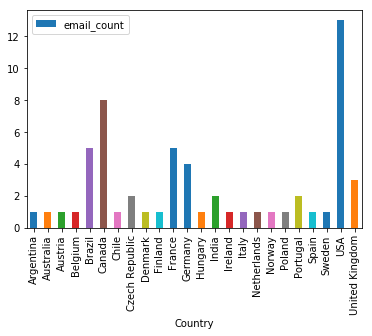

In [119]:
# df.plot.bar()
df.plot.bar('Country','email_count')
plt.show()

# 7. section 3

# 8. Joins

# 9. Automatic Joins

# 10. Hierarchical Tables

# 11. Dealing with large results

# 12. Creating and Manipulating my own databases and tables

In [43]:
# check table names
engine = create_engine('sqlite:///chinook.db')
connection = engine.connect()
print('Table names: ', engine.table_names())

Table names:  ['albums', 'artists', 'customers', 'employees', 'genres', 'invoice_items', 'invoices', 'media_types', 'playlist_track', 'playlists', 'sqlite_sequence', 'sqlite_stat1', 'tracks']


In [105]:
# Create engine: engine
engine = create_engine('sqlite:///chinook.db')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM customers", engine)

print('dataframe dimensions: ', df.shape)
print(df.head(5))

dataframe dimensions:  (59, 13)
   CustomerId  FirstName     LastName  \
0           1       Luís    Gonçalves   
1           2     Leonie       Köhler   
2           3   François     Tremblay   
3           4      Bjørn       Hansen   
4           5  František  Wichterlová   

                                            Company  \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   
3                                              None   
4                                  JetBrains s.r.o.   

                           Address                 City State         Country  \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP          Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None         Germany   
2                1498 rue Bélanger             Montréal    QC          Canada   
3                 Ullevålsveien 14                 Oslo  None     

# 3. Advanced SQLAlchemy Queries
Calculating Values in a Query

Math Operators
- addition + 
- subtraction - 
- multiplication *
- division /
- modulus %
- Work differently on different data types

## 3.1 Calculating Difference
- notice wrapping expression with () and then labeling it

In [ ]:
# difference
stmt = select([census.columns.age,
              (census.columns.pop2008-
              census.columns.pop2000).label('pop_change')
              ])
# group by age
stmt = stmt.group_by(census.columns.age)
# order by pop_change
stmt = stmt.order_by(desc('pop_change'))
# return top 5 results
stmt = stmt.limit(5)
# execute the statement
results = connection.execute(stmt).fetchall()
# print
print(results)

## 3.2 Case Statement
- notice wrapping expression with () and then labeling it
- used to treat data differently based on a condition
- accepts a list of conditions to match and a column to return if the condition matches
- the list of conditions ends with an else clause to determine what to do when a record doesn't match any prior conditions

In [ ]:
# Case example
from sqlalchemy import case

stmt = select([
    func.sum(
        case([
            (census.columns.state == 'New york',
             census.columns.pop2008)
    ], else_=0))
])
results = connection.execute(stmt).fetchall()
print(results)

## 3.3 Cast Statement
- converts data to another type
- use for converting
    - integers to floats for division
    - strings to dates and times
- accepts a column or expression and the target Type


## 3.4 Percentage Example - Case and Cast

In [ ]:
from sqlalchemy import case, cast, Float
# calculate a percentage, note: convert to float type
stmt = select([
    (func.sum(
        case([
            (census.columns.state == 'New york',
             census.columns.pop2008)
        ], else_=0)) /
     cast(func.sum(census.columns.pop2008),
          Float) * 100).label('ny_percent')
])
results = connection.execute(stmt).fetchall()
print(results)

## 3.5 Connecting to a MySQL Database
- pymysql database driver for MySQL database

Before you jump into the calculation exercises, let's begin by connecting to our database. Recall that in the last chapter you connected to a PostgreSQL database. Now, you'll connect to a MySQL database, for which many prefer to use the pymysql database driver, which, like psycopg2 for PostgreSQL, you have to install prior to use.

This connection string is going to start with 'mysql+pymysql://', indicating which dialect and driver you're using to establish the connection. The dialect block is followed by the 'username:password' combo. Next, you specify the host and port with the following '@host:port/'. Finally, you wrap up the connection string with the 'database_name'.

Now you'll practice connecting to a MySQL database: it will be the same census database that you have already been working with. One of the great things about SQLAlchemy is that, after connecting, it abstracts over the type of database it has connected to and you can write the same SQLAlchemy code, regardless!

Create an engine to the census database by concatenating the following strings and passing them to create_engine():
- 'mysql+pymysql://' (the dialect and driver).
- 'student:datacamp' (the username and password).
- '@courses.csrrinzqubik.us-east-1.rds.amazonaws.com:3306/' (the host and port).
- 'census' (the database name).

In [ ]:
# Import create_engine function
from sqlalchemy import create_engine

# Create an engine to the census database
engine = create_engine('mysql+pymysql://' +
'student:datacamp' +
'@courses.csrrinzqubik.us-east-1.rds.amazonaws.com:3306/'+
'census')

# Print the table names
print(engine.table_names())

# output
['census', 'state_fact']

### 3.5.1 Calculating a Difference between Two Columns
Often, you'll need to perform math operations as part of a query, such as if you wanted to calculate the change in population from 2000 to 2008. For math operations on numbers, the operators in SQLAlchemy work the same way as they do in Python.

You can use these operators to perform addition (+), subtraction (-), multiplication (*), division (/), and modulus (%) operations. Note: They behave differently when used with non-numeric column types.

Let's now find the top 5 states by population growth between 2000 and 2008. 

In [ ]:
# Build query to return state names by population difference from 
# 2008 to 2000: stmt
stmt = select([census.columns.state,
(census.columns.pop2008-census.columns.pop2000).label('pop_change')])

# Append group by for the state: stmt
stmt = stmt.group_by(census.columns.state)

# Append order by for pop_change descendingly: stmt
stmt = stmt.order_by(desc('pop_change'))

# Return only 5 results: stmt
stmt = stmt.limit(5)

# Use connection to execute the statement and fetch all results
results = connection.execute(stmt).fetchall()

# Print the state and population change for each record
for result in results:
    print('{}:{}'.format(result.state, result.pop_change))
    
# output
California:105705
Florida:100984
Texas:51901
New York:47098
Pennsylvania:42387

### 3.5.2 Determining the Overall Percentage of Females
It's possible to combine functions and operators in a single select statement as well. These combinations can be exceptionally handy when we want to calculate percentages or averages, and we can also use the case() expression to operate on data that meets specific criteria while not affecting the query as a whole. The case() expression accepts a list of conditions to match and the column to return if the condition matches, followed by an else_ if none of the conditions match. We can wrap this entire expression in any function or math operation we like.

Often when performing integer division, we want to get a float back. While some databases will do this automatically, you can use the cast() function to convert an expression to a particular type.

Build an expression female_pop2000to calculate female population in 2000. To achieve this:
    - Use case() inside func.sum().
    - The first argument of case() is a list containing a tuple of
        - i) A boolean checking that census.columns.sex is equal to 'F'.
        - ii) The column census.columns.pop2000.
    - The second argument is the else_ condition, which should be set to 0.
- Calculate the total population in 2000 and use cast() to convert it to Float.
- Build a query to calculate the percentage of females in 2000. To do this, divide female_pop2000 by total_pop2000 and multiply by 100.
- Execute the query and print percent_female.

In [ ]:
# import case, cast and Float from sqlalchemy
from sqlalchemy import case, cast, Float

# Build an expression to calculate female population in 2000
female_pop2000 = func.sum(
    case([
        (census.columns.sex == 'F', census.columns.pop2000)
    ], else_=0))

# Cast an expression to calculate total population in 2000 to Float
total_pop2000 = cast(func.sum(census.columns.pop2000), Float)

# Build a query to calculate the percentage of females in 2000: stmt
stmt = select([female_pop2000 / total_pop2000* 100])

# Execute the query and store the scalar result: percent_female
percent_female = connection.execute(stmt).scalar()

# Print the percentage
print(percent_female)

# output


## 3.6 SQL relationships
Relationships
- allow us to avoid duplicate data
- make it easy to change things in one place
- useful to break out info from a table we don't need very often

Join
- accepts a Table and an optional expression that explains how the two tables are related
- the expression is not needed if the relationship is predefined and available via reflection
- comes immediately after the select() clause, prior to any where(), order_by or group_by() clauses

Select_from
- used to replace the default, derived FROM clause with a join
- wraps the join() clause

Joining Tables without Predefined Relationship
- join accepts a Table and an optional expression that explains how the two tables are related
- will only join on data that match between the two columns
- avoid joining on columns of different types


### 3.6.1 Automatic Joins

In [ ]:
stmt = select([census.columns.pop2008,
               state_fact.columns.abbreviation
              ])
results = connection.execute(stmt).fetchall()
print(results)

###  3.6.2 Select_from example

In [ ]:
stmt = select([func.sum(census.columns.pop2000)])
# join census table with state_fact table
stmt = stmt.select_from(census.join(state_fact))
# subset based on condition
stmt = stmt.where(state_fact.columns.circuit_court == '10')
result = connection.execute(stmt).scalar()
print(result)

### 3.6.3 Select_from example - join tables w/o predefined relationship 

In [ ]:
stmt = select([func.sum(census.columns.pop2000)])
# join census table with state_fact table
stmt = stmt.select_from(
    census.join(state_fact, census.columns.state
               == state_fact.columns.name))
stmt = stmt.where(state_fact.columns.census_division_name == 
                  'Ease South Central')
result = connection.execute(stmt).scalar()
print(result)

### 3.6.4 Automatic Joins with an Established Relationship
If you have two tables that already have an established relationship, you can automatically use that relationship by just adding the columns we want from each table to the select statement. Recall that Jason constructed the following query:

- stmt = select([census.columns.pop2008, state_fact.columns.abbreviation])

in order to join the census and state_fact tables and select the pop2008 column from the first and the abbreviation column from the second. In this case, the census and state_fact tables had a pre-defined relationship: the state column of the former corresponded to the name column of the latter.

In this exercise, you'll use the same predefined relationship to select the pop2000 and abbreviation columns!

In [ ]:
# Build a statement to join census and state_fact tables: stmt
stmt = select([census.columns.pop2000, 
state_fact.columns.abbreviation])

# Execute the statement and get the first result: result
result = connection.execute(stmt).first()

# Loop over the keys in the result object and print the key and value
for key in result.keys():
    print(key, getattr(result, key))

# output
pop2000 89600
abbreviation IL

### 3.6.5 Joins
If you aren't selecting columns from both tables or the two tables don't have a defined relationship, you can still use the .join() method on a table to join it with another table and get extra data related to our query. The join() takes the table object you want to join in as the first argument and a condition that indicates how the tables are related to the second argument. Finally, you use the .select_from() method on the select statement to wrap the join clause. For example, in the video, Jason executed the following code to join the census table to the state_fact table such that the state column of the census table corresponded to the name column of the state_fact table.

- stmt = stmt.select_from(
    census.join(
    state_fact, census.columns.state == 
    state_fact.columns.name)
    
    
- Build a statement to select ALL the columns from the census and state_fact tables. To select ALL the columns from two tables employees and sales, for example, you would use stmt = select([employees, sales]).
- Append a select_from to stmt to join the census table to the state_fact table by the state column in census and the name column in the state_fact table.

In [ ]:
# Build a statement to select the census and state_fact tables: stmt
stmt = select([census, state_fact])

# Add a select_from clause that wraps a join for the census and state_fact
# tables where the census state column and state_fact name column match
stmt = stmt.select_from(
    census.join(state_fact, census.columns.state == state_fact.columns.name))

# Execute the statement and get the first result: result
result = connection.execute(stmt).first()

# Loop over the keys in the result object and print the key and value
for key in result.keys():
    print(key, getattr(result, key))


### 3.6.6 More Practice with Joins
You can use the same select statement you built in the last exercise, however, let's add a twist and only return a few columns and use the other table in a group_by() clause.

- Build a statement to select:
    - The state column from the census table.
    - The sum of the pop2008 column from the census table.
    - The census_division_name column from the state_fact table.
- Append a .select_from() to stmt in order to join the census and state_fact tables by the state and name columns.
- Group the statement by the name column of the state_fact table.
- Execute the statement to get all the records and save it as results.

In [ ]:
# Build a statement to select the state, sum of 2008 population and 
# census
# division name: stmt
stmt = select([
    census.columns.state,
    func.sum(census.columns.pop2008),
    state_fact.columns.census_division_name
])

# Append select_from to join the census and state_fact tables by the 
# census state and state_fact name columns
stmt = stmt.select_from(
    census.join(state_fact, 
                census.columns.state == state_fact.columns.name)
)

# Append a group by for the state_fact name column
stmt = stmt.group_by(state_fact.columns.name)

# Execute the statement and get the results: results
results = connection.execute(stmt).fetchall()

# Loop over the the results object and print each record.
for record in results:
    print(record)
    
<script.py> output:
    ('Alabama', 4649367, 'East South Central')
    ('Alaska', 664546, 'Pacific')
    ('Arizona', 6480767, 'Mountain')
    # ...etc

## 3.7 Working with Hierarchical Tables - tables that join with themselves

Hierarchical Tables
- contain a relationship with themselves
- commonly found in:
    - organizational
    - geographic
    - network
    - graph
    
Hierarchical Tables - alias()
- requires a way to view the table via multiple names
- creates a unique reference that we can use

Group_by and Func
- it's important to target group_by() at the right alias
- be careful with what you perform functions on
- if you don't find yourself using both the alias and the table name for a query, don't create the alias at all

### 3.7.1 Querying Hierarchical Data

In [ ]:
managers = employees.alias()
stmt = select(
        [managers.columns.name.label('manager'),
        employees.columns.name.label('employee')]
)
# use alias to join
stmt = stmt.select_from(employees.join(
managers, managers.columns.id == employees.columns.manager))
# order by manager name
stmt = stmt.order_by(managers.columns.name)
print(connection.execute(stmt).fetchall())

### 3.7.2 Hierarchical data - group_by and func

In [ ]:
managers = employees.alias()
stmt = select([managers.columns.name,
               func.sum(employees.columns.sal)])
# use alias to join
stmt = stmt.select_from(employees.join(
managers, managers.columns.id == employees.columns.manager))
# order by manager name
stmt = stmt.order_by(managers.columns.name)
print(connection.execute(stmt).fetchall())

### 3.7.3 Using alias to handle same table joined queries
Often, you'll have tables that contain hierarchical data, such as employees and managers who are also employees. For this reason, you may wish to join a table to itself on different columns. The .alias() method, which creates a copy of a table, helps accomplish this task. Because it's the same table, you only need a where clause to specify the join condition.

Here, you'll use the .alias() method to build a query to join the employees table against itself to determine to whom everyone reports.

- Save an alias of the employees table as managers. To do so, apply the method .alias() to employees.
- Build a query to select the employee name and their manager's name. The manager's name has already been selected for you. Use label to label the name column of employees as 'employee'.
- Append a where clause to stmt to match where the id column of the managers table corresponds to the mgr column of the employees table.
- Order the statement by the name column of the managers table.

In [ ]:
# Make an alias of the employees table: managers
managers = employees.alias()

# Build a query to select manager's and their employees names: stmt
stmt = select(
    [managers.columns.name.label('manager'),
     employees.columns.name.label('employee')]
)

# Match managers id with employees mgr: stmt
stmt = stmt.where(managers.columns.id == employees.columns.mgr)

# Order the statement by the managers name: stmt
stmt = stmt.order_by(managers.columns.name)

# Execute statement: results
results = connection.execute(stmt).fetchall()

# Print records
for record in results:
    print(record)



### 3.7.4 Leveraging Functions and Group_bys with Hierarchical Data
It's also common to want to roll up data which is in a hierarchical table. Rolling up data requires making sure you're careful which alias you use to perform the group_bys and which table you use for the function.

Here, your job is to get a count of employees for each manager.

- Build a query to select the name column of the managers table and the count of the number of their employees. The function func.count() has been imported and will be useful! Use it to count the id column of the employees table.
- Using a .where() clause, filter the records where the id column of the managers table and mgr column of the employees table are equal.

In [ ]:
# Make an alias of the employees table: managers
managers = employees.alias()

# Build a query to select managers and counts of their employees: stmt
stmt = select([managers.columns.name, func.count(employees.columns.id)])

# Append a where clause that ensures the manager id and employee mgr are equal
stmt = stmt.where(managers.columns.id == employees.columns.mgr)

# Group by Managers Name
stmt = stmt.group_by(managers.columns.name)

# Execute statement: results
results = connection.execute(stmt).fetchall()

# print manager
for record in results:
    print(record)



## 3.8 Dealing with Large ResultSets
- fetchmany() lets us specify how many rows we want to act upon
- we can loop over fetchmany()
- it returns an empty list when there are no more records
- required: call close method on ResultProxy afterwards

### 3.8.1 Fetching many rows - .fetchmany()

In [ ]:
while more_results:
    partial_results = results_proxy.fetchmany(50)
    if partial_results == []:
        more_results = False
        
    for row in partial_results:
        state_count[row.state] += 1
    
results_proxy.close()

### 3.8.2 Working on Blocks of Records
Fantastic work so far! As Jason discussed in the video, sometimes you may have the need to work on a large ResultProxy, and you may not have the memory to load all the results at once. To work around that issue, you can get blocks of rows from the ResultProxy by using the .fetchmany() method inside a loop. With .fetchmany(), give it an argument of the number of records you want. When you reach an empty list, there are no more rows left to fetch, and you have processed all the results of the query. Then you need to use the .close() method to close out the connection to the database.

You'll now have the chance to practice this on a large ResultProxy called results_proxy that has been pre-loaded for you to work with.

- Loop over the partial_results and, if row.state is a key in the state_count dictionary, increment state_count[row.state] by 1; otherwise set state_count[row.state] to 1.

In [ ]:
# Start a while loop checking for more results
while more_results:
    # Fetch the first 50 results from the ResultProxy: partial_results
    partial_results = results_proxy.fetchmany(50)

    # if empty list, set more_results to False
    if partial_results == []:
        more_results = False

    # Loop over the fetched records and increment the count for the state
    for row in partial_results:
        if row.state in state_count:
            state_count[row.state] += 1
        else:
            state_count[row.state] = 1

# Close the ResultProxy, and thus the connection
results_proxy.close()

# Print the count by state
print(state_count)


# 4. Creating and Manipulating your own Databases and Tables
Creating Databases
- varies by the db type
- db like PostgreSQL and MySQL have command line tools to initialize the database
- with SQLite, the create_engine() statement will create the db and file if they do not already exist

Creating Tables
- still uses the Table object like we did for reflection
- replaces the autoload keyword arguments with Column objects
- creates the tables in the actual db by using the create_all() method on the MetaData instance
- You need to use other tools to handle db table updates, such as Alembic or raw SQL

Creating Tables - Additional Column Options
- unique - forces all values for the data in a column to be unique
- nullable - determines if a column can be empty in a row
- default - sets a default value if one isn't supplied

## 4.1 Building a Table

In [ ]:
# import different data types
from sqlalchemy import (Table, Column, String, Integer, Decimal, 
                        Boolean)
# create a Table object
employees = Table('employees', metadata,
                 Column('id', Integer()),
                 Column('name', String(255)),
                 Column('salary', Decimal()),
                 Column('active', Boolean()))

metadata.create_all(engine)

# verify that the table was created
engine.table_names()
[u'employees']




## 4.2 Building a Table with Additional Options

In [ ]:
employees = Table('employees', metadata,
                 Column('id', Integer()),
                 Column('name', String(255), unique=True, 
                        nullable=False),
                 Column('salary', Float(), default=100.00),
                 Column('active', Boolean(), default=True))

# check constraints and defaults
employees.constraints

## 4.3 Examples

### Example: Creating Tables with SQLAlchemy
Previously, you used the Table object to reflect a table from an existing database, but what if you wanted to create a new table? You'd still use the Table object; however, you'd need to replace the autoload and autoload_with parameters with Column objects.

The Column object takes a name, a SQLAlchemy type with an optional format, and optional keyword arguments for different constraints.

When defining the table, recall how in the video Jason passed in 255 as the maximum length of a String by using Column('name', String(255)). Checking out the slides from the video may help: you can download them by clicking on 'Slides' next to the IPython Shell.

After defining the table, you can create the table in the database by using the .create_all() method on metadata and supplying the engine as the only parameter. Go for it!

In [ ]:
# Import Table, Column, String, Integer, Float, Boolean from 
# sqlalchemy
from sqlalchemy import Table, Column, String, Integer, Float, 
Boolean

# Define a new table with a name, count, amount, and valid column: 
# data
data = Table('data', metadata,
             Column('name', String(255)),
             Column('count', Integer()),
             Column('amount', Float()),
             Column('valid', Boolean())
)

# Use the metadata to create the table
metadata.create_all(engine)

# Print table details
print(repr(data))


### Example: Constraints and Data Defaults
You're now going to practice creating a table with some constraints! Often, you'll need to make sure that a column is unique, nullable, a positive value, or related to a column in another table. This is where constraints come in.

As Jason showed you in the video, in addition to constraints, you can also set a default value for the column if no data is passed to it via the default keyword on the column.

In [ ]:
# Import Table, Column, String, Integer, Float, Boolean from 
# sqlalchemy
from sqlalchemy import Table, Column, String, Integer, Float, 
Boolean

# Define a new table with a name, count, amount, and valid column: 
# data
data = Table('data', metadata,
             Column('name', String(255), unique=True),
             Column('count', Integer(), default=1),
             Column('amount', Float()),
             Column('valid', Boolean(), default=False)
)

# Use the metadata to create the table
metadata.create_all(engine)

# Print the table details
print(repr(metadata.tables['data']))


## 4.4 Inserting Data into a Table
Adding Data to a Table
- done with the insert() statement
- insert() takes the table we are loading data into as the argument
- we add all the values we want to insert in with the values clause as column=value pairs
- doesn't return any rows, so no need for a fetch method

Inserting Multiple Rows
- build an insert statement without any values
- build a list of dictionaries that represent all the values clauses for the rows you want to insert
- pass both the stmt and the values list to the execute method on connection

### 4.4.1 Insert one row

In [ ]:
from sqlalchemy import insert
stmt = insert(employees).values(id=1, name='Jason',
                               salary=1.00, active=True)
result_proxy = connection.exectue(stmt)
print(result_proxy.rowcount)
# 1

### 4.4.2 Insert multiple rows 

In [ ]:
stmt = insert(employees)
# one dictionary for each record you want to insert
values_list = [
    {'id':2, 'name':'Rebecca', 'salary':2.00, 'active'=True},
    {'id':3, 'name':'Bob', 'salary':0.00, 'active'=False}
]
result_proxy = connection.execute(stmt, values_list)
print(result_proxy.rowcount)
# 2

### Practice 1: Inserting a single row with an insert() statement
There are several ways to perform an insert with SQLAlchemy; however, we are going to focus on the one that follows the same pattern as the select statement.

It uses an insert statement where you specify the table as an argument, and supply the data you wish to insert into the value via the .values() method as keyword arguments.

Here, the name of the table is data. 

In [ ]:
# Import insert and select from sqlalchemy
from sqlalchemy import insert, select

# Build an insert statement to insert a record into the 
# data table: stmt
stmt = insert(data).values(name='Anna', count=1, amount=1000.00, 
                           valid=True)

# Execute the statement via the connection: results
results = connection.execute(stmt)

# Print result rowcount
print(results.rowcount)

# Build a select statement to validate the insert
stmt = select([data]).where(data.columns.name == 'Anna')

# Print the result of executing the query.
print(connection.execute(stmt).first())

<script.py> output:
    1
    ('Anna', 1, 1000.0, True)

### Practice 2: Inserting Multiple Records at Once
It's time to practice inserting multiple records at once!

As Jason showed you in the video, you'll want to first build a list of dictionaries that represents the data you want to insert. Then, in the .execute() method, you can pair this list of dictionaries with an insert statement, which will insert all the records in your list of dictionaries.

In [ ]:
# Build a list of dictionaries: values_list
values_list = [
    {'name': 'Anna', 'count': 1, 'amount': 1000.00, 'valid': True},
    {'name': 'Taylor', 'count': 1, 'amount': 750.00, 'valid': False}
]

# Build an insert statement for the data table: stmt
stmt = insert(data)

# Execute stmt with the values_list: results
results = connection.execute(stmt, values_list)

# Print rowcount
print(results.rowcount)

# 2

### 4.4.3 Loading a CSV into a Table
We have used the csv module to set up a csv_reader, which is just a reader object that can iterate over the lines in a given CSV file - in this case, a census CSV file. Using the enumerate() function, you can loop over the csv_reader to handle the results one at a time. Here, for example, the first line it would return is:

0 ['Illinois', 'M', '0', '89600', '95012']

0 is the idx - or line number - while ['Illinois', 'M', '0', '89600', '95012'] is the row, corresponding to the column names 'state' , 'sex', 'age', 'pop2000 'and 'pop2008'. 'Illinois' can be accessed with row[0], 'M' with row[1], and so on. You can create a dictionary containing this information where the keys are the column names and the values are the entries in each line. Then, by appending this dictionary to a list, you can combine it with an insert statement to load it all into a table!

In [ ]:
# Create a insert statement for census: stmt
stmt = insert(census)

# Create an empty list and zeroed row count: values_list, total_rowcount
values_list = []
total_rowcount = 0

# Enumerate the rows of csv_reader
for idx, row in enumerate(csv_reader):
    #create data and append to values_list
    data = {'state': row[0], 'sex': row[1], 'age': row[2], 'pop2000': row[3],
            'pop2008': row[4]}
    values_list.append(data)

    # Check to see if divisible by 51
    if idx % 51 == 0:
        results = connection.execute(stmt, values_list)
        total_rowcount += results.rowcount
        values_list = []

# Print total rowcount
print(total_rowcount)

# 8722

## 4.5 Updating Data in a Table
- done with the update statement
- similar to the insert statement but includes a where clause to determine what record will be updated
- we add all the values we want to update with the values clause as column=value pairs

### 4.5.1 Updating One Row - update + where clauses

In [ ]:
from sqlalchemy import update
stmt = update(employees)
stmt = stmt.where(employees.columns.id ==3)
stmt = stmt.values(active=True)
result_proxy = connection.execute(stmt)

# check only 1 row was updated
print(result_proxy.rowcount)
# 1

### 4.5.2 Updating Multiple Rows
- build a where clause that will select all the records you want to update
- check to make sure you updated the correct number of rows

In [ ]:
stmt = update(employees)
stmt = stmt.where(employees.columns.active == True)
# update active and salary columns
stmt = stmt.values(active=False, salary=0.00)
result_proxy = connection.execute(stmt)
print(result_proxy.rowcount)
# 3

### 4.5.3 Correlated Updates
- Uses a select() statement to find the value for the column we are updating
- commonly used to update records to a maximum value or change a string to match an abbreviation from another table

In [ ]:
# want to pay all employees the same amount

new_salary = select([employees.columns.salary])

# get maximum salary
new_salary = new_salary.order_by(desc(employees.columns.salary))
new_salary = new_salary.limit(1)

# update every record
stmt = update(employees)
# set salary to select statment - which is max salary
stmt = stmt.values(salary=new_salary)
result_proxy = connection.execute(stmt)
print(result_proxy.rowcount)
# 3


### 4.5.4 Examples

#### 4.5.4.a Example 1: Updating individual records - update + where
The update statement is very similar to an insert statement, except that it also typically uses a where clause to help us determine what data to update. 

You'll be using the FIPS state code using here, which is appropriated by the U.S. government to identify U.S. states and certain other associated areas. Recall that you can update all wages in the employees table as follows:

stmt = update(employees).values(wage=100.00)
For your convenience, the names of the tables and columns of interest in this exercise are: state_fact (Table), name (Column), and fips_state (Column).

In [ ]:
# Build a select statement: select_stmt
select_stmt = select([state_fact]).where(
    state_fact.columns.name == 'New York')

# Print the results of executing the select_stmt
print(connection.execute(select_stmt).fetchall())

# Build a statement to update the fips_state to 36: stmt
stmt = update(state_fact).values(fips_state = 36)

# Append a where clause to limit it to records for New York state
stmt = stmt.where(state_fact.columns.name == 'New York')

# Execute the statement: results
results = connection.execute(stmt)

# Print rowcount
print(results.rowcount)

# Execute the select_stmt again to view the changes
print(connection.execute(select_stmt).fetchall())

# output
[('32', 'New York', 'NY', 'USA', 'state', '10', 'current', 'occupied', 
  '', '0', 'N.Y.', 'II', '1', 'Northeast', '2', 'Mid-Atlantic', '2')]
1
[('32', 'New York', 'NY', 'USA', 'state', '10', 'current', 'occupied', 
  '', '36', 'N.Y.', 'II', '1', 'Northeast', '2', 'Mid-Atlantic', '2')]

### 4.5.4.b Example 2: Updating Multiple Records
By using a where clause that selects more records, you can update multiple records at once.

For your convenience, the names of the tables and columns of interest in this exercise are: state_fact (Table), notes (Column), and census_region_name (Column).

In [ ]:
# Build a statement to update the notes to 'The Wild West': stmt
stmt = update(state_fact).values(notes='The Wild West')

# Append a where clause to match the West census region records
stmt = stmt.where(state_fact.columns.census_region_name == 'West')

# Execute the statement: results
results = connection.execute(stmt)

# Print rowcount
print(results.rowcount)

# output
# 13

### 4.5.4.c Example 3: Correlated Updates
You can also update records with data from a select statement. This is called a correlated update. It works by defining a select statement that returns the value you want to update the record with and assigning that as the value in an update statement.

You'll be using a flat_census in this exercise as the target of your correlated update. The flat_census table is a summarized copy of your census table.

- Build a statement to select the name column from state_fact. Save the statement as fips_stmt.
- Append a where clause to fips_stmt that matches fips_state from the state_fact table with fips_code in the flat_census table.
- Build an update statement to set the state_name in flat_census to fips_stmt. Save the statement as update_stmt.

In [ ]:
# Build a statement to select name from state_fact: stmt
fips_stmt = select([state_fact.columns.name])

# Append a where clause to Match the fips_state to flat_census fips_code
fips_stmt = fips_stmt.where(
    state_fact.columns.fips_state == flat_census.columns.fips_code)

# Build an update statement to set the name to fips_stmt: update_stmt
update_stmt = update(flat_census).values(state_name=fips_stmt)

# Execute update_stmt: results
results = connection.execute(update_stmt)

# Print rowcount
print(results.rowcount)

# output
# 51

## 4.6 Removing Data from a Database
- Done with the delete() statement
- delete() takes the table we are loading data into as the argument
- a where() clause is used to choose which rows to delete
- hard to undo, so BE CAREFUL!

### 4.6.1 Deleting all Data from a Table 

In [ ]:
from sqlalchemy import delete
stmt = select([func.count(extra_employees.columns.id)])
# check number of records selected
connection.execute(stmt).scalar()
# 3
delete_stmt = delete(extra_employees)
result_proxy = connection.execute(delete_stmt)
result_proxy.rowcount
# 3

### 4.6.2 Deleting Specific Rows
- build a where clause that will select all the records you want to delete

In [ ]:
stmt = delete(employees).where(employees.columns.id ==3)
result_proxy = connection.execute(stmt)
result_proxy.rowcount
# 1

### 4.6.3 Dropping a Table Completely
- uses the drop method on the table
- accepts the engine as an argument so it knows where to remove the table from
- won't remove it from metadata until the python process it restarted

In [ ]:
extra_employees.drop(engine)
# verify that it was deleted by seeing if it still exists
print(extra_employees.exists(engine))
# false

### 4.6.4 Dropping all the Tables
- Uses the drop_all() method on MetaData
- completely empty the database

In [ ]:
metadata.drop_all(engine)
engine.table_names()
# []

### 4.6.5 Practice examples 

#### 4.6.5.a Deleting all the records from a table
Often, you'll need to empty a table of all of its records so you can reload the data. You can do this with a delete statement with just the table as an argument. For example, in the video, Jason deleted the table extra_employees by executing as follows:

delete_stmt = delete(extra_employees)
result_proxy = connection.execute(delete_stmt)
Do be careful, though, as deleting cannot be undone!

In [ ]:
# Import delete, select
from sqlalchemy import delete, select

# Build a statement to empty the census table: stmt
stmt = delete(census)

# Execute the statement: results
results = connection.execute(stmt)

# Print affected rowcount
print(results.rowcount)

# Build a statement to select all records from the census table
stmt = select([census])

# Print the results of executing the statement to verify there are 
# no rows
print(connection.execute(stmt).fetchall())

# output
8772
[]

#### 4.6.5.b Deleting specific records
By using a where() clause, you can target the delete statement to remove only certain records. For example, Jason deleted all rows from the employees table that had id 3 with the following delete statement:

delete(employees).where(employees.columns.id == 3) 
Here you'll delete ALL rows which have 'M' in the sex column and 36 in the age column. We have included code at the start which computes the total number of these rows. It is important to make sure that this is the number of rows that you actually delete.

In [ ]:
# Build a statement to count records using the sex column for 
# Men ('M') age 36: stmt
stmt = select([func.count(census.columns.sex)]).where(
    and_(census.columns.sex == 'M',
         census.columns.age == 36)
)

# Execute the select statement and use the scalar() fetch method to 
# save the record count
to_delete = connection.execute(stmt).scalar()

# Build a statement to delete records from the census table: stmt_del
stmt_del = delete(census)

# Append a where clause to target Men ('M') age 36
stmt_del = stmt_del.where(
    and_(census.columns.sex == 'M',
         census.columns.age == 36)
)

# Execute the statement: results
results = connection.execute(stmt_del)

# Print affected rowcount and to_delete record count, make sure they 
# match
print(results.rowcount, to_delete)

# output
51 51

#### 4.6.5.c Deleting a Table Completely
You're now going to practice dropping individual tables from a database with the .drop() method, as well as all tables in a database with the .drop_all() method!

As Spider-Man's Uncle Ben (as well as Jason, in the video!) said: With great power, comes great responsibility. Do be careful when deleting tables, as it's not simple or fast to restore large databases! Remember, you can check to see if a table exists with the .exists() method.

This is the final exercise in this chapter: After this, you'll be ready to apply everything you've learned to a case study in the final chapter of this course!

- Drop the state_fact table by applying the method .drop() to it and passing it the argument engine (in fact, engine will be the sole argument for every function/method in this exercise!)
- Check to see if state_fact exists via print. Use the .exists() method with engine as the argument.
- Drop all the tables via the metadata using the .drop_all() method.
- Use a print statement to check if the census table exists.

In [ ]:
# Drop the state_fact table
state_fact.drop(engine)

# Check to see if state_fact exists
print(state_fact.exists(engine))

# Drop all tables
metadata.drop_all(engine)

# Check to see if census exists
print(census.exists(engine))

# output
False
False

# 5. Project: Putting it all together
Census Case study - 3 parts
- Part 1: Preparing SQLAlchemy and the Database
- Part 2: Loading Data into the Database
- Part 3: Solving Data Science Problems with Queries

## 5.1 Part 1: Preparing SQLAlchemy and the Database

In [ ]:
# create an Engine and MetaData object
from sqlalchemy import create_engine, MetaData
engine = create_engine('sqlite:///census_nyc.sqlite')
metadata = MetaData()

# create and save the census table
from sqlalchemy import (Table, Column, String, Integer, Decimal, Boolean)
employees = Table('employees', metadata,
                  Column('id', Integer()),
                  Column('name', String(255)),
                  Column('salary', Decimal()),
                  Column('active', Boolean())
                 )
metadata.create_all(engine)

### 5.1.a Practice: Setup the Engine and MetaData
In this exercise, your job is to create an engine to the database that will be used in this chapter. Then, you need to initialize its metadata.

Recall how you did this in Chapter 1 by leveraging create_engine() and MetaData.

In [ ]:
# Import create_engine, MetaData
from sqlalchemy import create_engine, MetaData

# Define an engine to connect to chapter5.sqlite: engine
engine = create_engine('sqlite:///chapter5.sqlite')

# Initialize MetaData: metadata
metadata = MetaData()


### 5.1.b Create the Table to the Database
Having setup the engine and initialized the metadata, you will now define the census table object and then create it in the database using the metadata and engine from the previous exercise. To create it in the database, you will have to use the .create_all() method on the metadata with engine as the argument.

It may help to refer back to the Chapter 4 exercise in which you learned how to create a table.

In [ ]:
# Import Table, Column, String, and Integer
from sqlalchemy import (Table, Column, String, Integer)

# Build a census table: census
census = Table('census', metadata,
               Column('state', String(30)),
               Column('sex', String(1)),
               Column('age', Integer()),
               Column('pop2000', Integer()),
               Column('pop2008', Integer()))

# Create the table in the database
metadata.create_all(engine)


## 5.2 Part 2: Populating the Database
- load a csv file into a values list
- insert the values list into the census table

In [ ]:
# load a csv file into a values list
# empty list
values_list = []
# loop over rows of csv and use dictionary to load
for row in csv_reader:
    data = {'state':row[0], 'sex':row[1], 'age':row[2],
            'pop2000':row[3], 'pop2008':row[4]}
    values_list.append(data)

# insert the values list into the census table
from sqlalchemy import insert
stmt = insert(employees)
result_proxy = connection.execute(stmt, values_list)
print(result_proxy.rowcount)
# 2


### 5.2.a Practice: Reading the Data from the CSV
Leverage the Python CSV module from the standard library and load the data into a list of dictionaries.

It may help to refer back to the Chapter 4 exercise in which you did something similar.

In [ ]:
# Create an empty list: values_list
values_list = []

# Iterate over the rows
for row in csv_reader:
    # Create a dictionary with the values
    data = {'state': row[0], 'sex': row[1], 'age':row[2], 
            'pop2000': row[3], 'pop2008': row[4]}
    # Append the dictionary to the values list
    values_list.append(data)

### 5.2.b Practice: Load Data from a list into the Table
Using the multiple insert pattern, in this exercise, you will load the data from values_list into the table.

In [ ]:
# Import insert
from sqlalchemy import insert

# Build insert statement: stmt
stmt = insert(census)

# Use values_list to insert data: results
results = connection.execute(stmt, values_list)

# Print rowcount
print(results.rowcount)


## 5.3 Example DB Queries
Answering Data Science Questions with Queries

### 5.3.1 Determine Average Age for Males and Females 

In [ ]:
from sqlalchemy import select
stmt = select([census.columns.sex,
               (func.sum(census.columns.pop2008 *
                        census.columns.age) /
                func.sum(census.columns.pop2008)
               ).label('average_age')
              ])
stmt = stmt.group_by(census.columns.sex)
results = connection.execute(stmt).fetchall()


### 5.3.2 Determine the percentage of Females for each state
- use Case and Cast clauses

In [ ]:
from sqlalchemy import case, cast, Float
stmt = select([
    (func.sum(
        case([(census.columns.state == 'New York',
               census.columns.pop2008)], else_=0)) /
     cast(func.sum(census.columns.pop2008),
         Float) * 100).label('ny_percent')    
])

### 5.3.3 Determine the top 5 states by population change from 2000 to 2008 

In [ ]:
stmt = select([census.columns.age,
               (census.columns.pop2008 -
                census.columns.pop2000).label('pop_change')
              ])
stmt = stmt.order_by('pop_change')
stmt = stmt.limit(5)

### 5.3.4 Practice

#### 1. Build a Query to Determine the Average Age by Population
In this exercise, you will use the func.sum() and group_by() methods to first determine the average age weighted by the population in 2008, and then group by sex.

As Jason discussed in the video, a weighted average is calculated as the sum of the product of the weights and averages divided by the sum of all the weights.

For example, the following statement determines the average age weighted by the population in 2000:

stmt = select([census.columns.sex,
               (func.sum(census.columns.pop2000 * census.columns.age) /
                func.sum(census.columns.pop2000)).label('average_age')
               ])


In [ ]:
# Import select
from sqlalchemy import select

# Calculate weighted average age: stmt
stmt = select([census.columns.sex,
               (func.sum(census.columns.pop2008 * census.columns.age) /
                func.sum(census.columns.pop2008)).label('average_age')
               ])

# Group by sex
stmt = stmt.group_by(census.columns.sex)

# Execute the query and store the results: results
results = connection.execute(stmt).fetchall()

# Print the average age by sex
for result in results:
    print(result.sex, result.average_age)


#### 2. Build a Query to Determine the Percentage of Population by Gender and State
In this exercise, you will write a query to determine the percentage of the population in 2000 that comprised of women. You will group this query by state.

- Define a statement to select state and the percentage of females in 2000.
    - Inside func.sum(), use case() to select females (using the sex column) from pop2000. Remember to specify else_=0 if the sex is not 'F'.
    - To get the percentage, divide the number of females in the year 2000 by the overall population in 2000. Cast the divisor - census.columns.pop2000 - to Float before multiplying by 100.
- Group the query by state.
- Execute the query and store it as results.


In [ ]:
# import case, cast and Float from sqlalchemy
from sqlalchemy import case, cast, Float

# Build a query to calculate the percentage of females in 2000: stmt
stmt = select([census.columns.state,
    (func.sum(
        case([
            (census.columns.sex == 'F', 
            census.columns.pop2000)
        ], else_=0)) /
     cast(func.sum(census.columns.pop2000), Float) * 100).
               label('percent_female')
])

# Group By state
stmt = stmt.group_by(census.columns.state)

# Execute the query and store the results: results
results = connection.execute(stmt).fetchall()

# Print the percentage
for result in results:
    print(result.state, result.percent_female)

# output
# Alabama 51.8324077702
# Alaska 49.3014978935
# Arizona 50.2236130306
# ...etc

#### 3. Build a Query to Determine the Population Difference by State from the 2000 and 2008 Censuses
In this final exercise, you will write a query to calculate the states that changed the most in population. You will limit your query to display only the top 10 states.

In [ ]:
# Build query to return state name and population difference from 
# 2008 to 2000
stmt = select([census.columns.state,
     (census.columns.pop2008-census.columns.pop2000).label('pop_change')
])

# Group by State
stmt = stmt.group_by(census.columns.state)

# Order by Population Change
stmt = stmt.order_by(desc('pop_change'))

# Limit to top 10
stmt = stmt.limit(10)

# Use connection to execute the statement and fetch all results
results = connection.execute(stmt).fetchall()

# Print the state and population change for each record
for result in results:
    print('{}:{}'.format(result.state, result.pop_change))

# output
# California:105705
# Florida:100984
# Texas:51901
# New York:47098
# Pennsylvania:42387
# Arizona:29509
# Ohio:29392
# Illinois:26221
# Michigan:25126
# North Carolina:24108